# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

<Figure size 720x576 with 0 Axes>

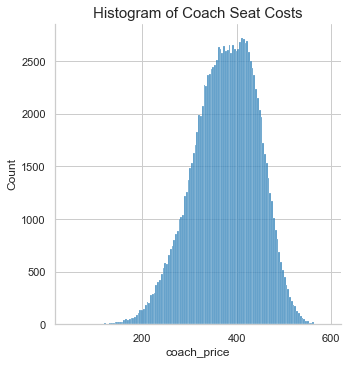

376.5852530821279
[331.445   380.56    426.67625]


<Figure size 432x288 with 0 Axes>

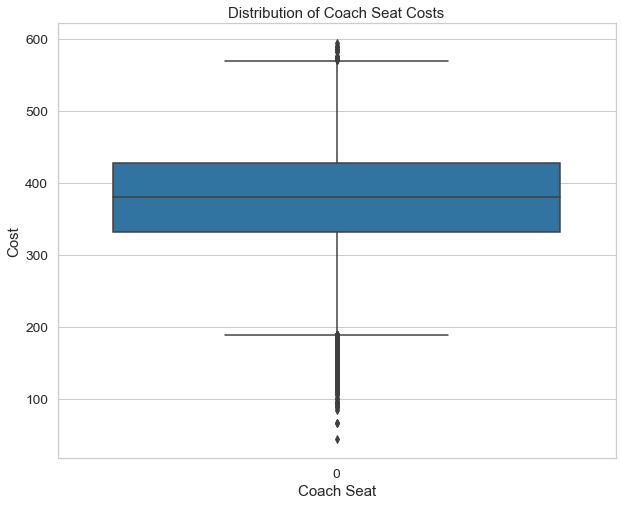

<Figure size 432x288 with 0 Axes>

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
from scipy.stats import pearsonr
import matplotlib.ticker as mtick

## Read in Data
flight = pd.read_csv("flight.csv")
#print(flight.head())
#print(flight.columns)
#print(flight.info()) ## 129,780 rows

## Task 1
# plot histogram of coach seat prices to get a feel for the shape of the data
plt.figure(figsize=(10,8))
sns.displot(flight.coach_price)
sns.set_context('notebook', font_scale=1.25)
plt.title('Histogram of Coach Seat Costs')

plt.show()
plt.clf()

# determine average coach ticket price
coach_avg = np.mean(flight.coach_price)
print(coach_avg)

# determine quartiles to see if $500 seems like a good price for a ticket
quartiles=np.quantile(flight.coach_price, [0.25, 0.5, 0.75])
print(quartiles)
# plot box plot to visualize quartiles
plt.figure(figsize=(10,8))
sns.boxplot(data=flight.coach_price)
sns.set_context('notebook', font_scale=1.25)
plt.xlabel('Coach Seat')
plt.ylabel('Cost')
plt.title('Distribution of Coach Seat Costs')

plt.show()
plt.clf()

1) What do coach ticket prices look like? <br>
__Coach ticket prices appear to range in cost from around \\$100-600, with the majority costing around \\$350-450.__ 
<br>
<br>
2) What are the high and low values? <br>
__Min: \~\\$100, Max: \~\\$600.__ <br>
<br>
3) What would be considered the average? <br>
__By eye: \~\\$400, By calc.: \\$376.58.__ <br>
<br>
4) Does $500 seem like a good price for a coach ticket? <br>
__A \\$500 ticket seems quite expensive as it is \~\\$75 higher than 75\% of all tickets.__ <br>
<br>

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

Max: 593.635
Min: 170.77
Avg: 431.8343773728164
[390.26625 437.115   480.04375]


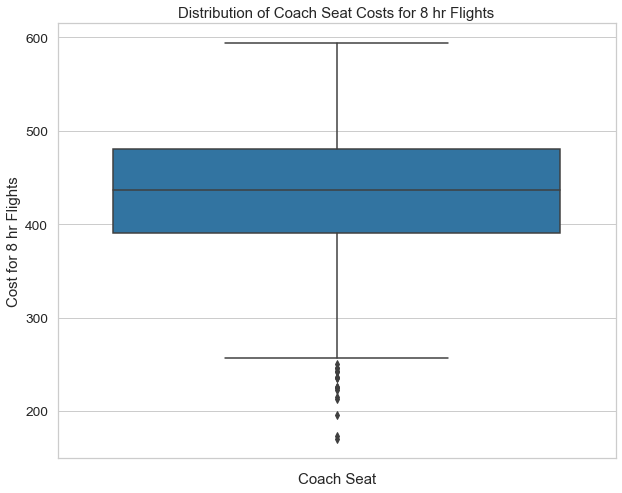

<Figure size 432x288 with 0 Axes>

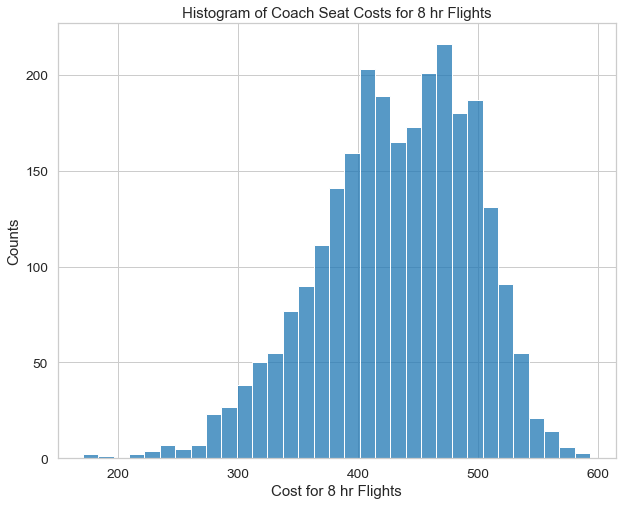

<Figure size 432x288 with 0 Axes>

In [137]:
## Task 2
coach_8hr=flight.coach_price[flight.hours == 8]
#print(coach_8hr)

# explore actual costs
print('Max:', np.max(coach_8hr))
print('Min:', np.min(coach_8hr))
print('Avg:', np.mean(coach_8hr))

# determine quartiles to see if $500 seems like a good price for a ticket
quartiles_8hr=np.quantile(coach_8hr, [0.25, 0.5, 0.75])
print(quartiles_8hr)

# visualize these costs with a box plot
eight_hr_flights = flight[flight.hours == 8]
#print(eight_hr_flights.coach_price)
plt.figure(figsize=(10,8))
sns.boxplot(data=eight_hr_flights, y='coach_price')
sns.set_context('notebook', font_scale=1.25)
plt.xlabel('Coach Seat')
plt.ylabel('Cost for 8 hr Flights')
plt.title('Distribution of Coach Seat Costs for 8 hr Flights')

plt.show()
plt.clf()

# visualize with a histogram
plt.figure(figsize=(10,8))
sns.histplot(eight_hr_flights.coach_price)
sns.set_context('notebook', font_scale=1.25)
plt.xlabel('Cost for 8 hr Flights')
plt.ylabel('Counts')
plt.title('Histogram of Coach Seat Costs for 8 hr Flights')

plt.show()
plt.clf()


1) What are the high, low, and average prices for 8-hour-long flights? <br>
__Max: \\$593.64, Min: \\$170.77, Avg.: \\$431.83__ <br>
<br>
2) Does a $500 dollar ticket seem more reasonable than before? <br>
__It does seem MORE reasonable but is still \~\\$70 above average and \~\\$20 higher than 75\% of tickets.__ <br>
<br>

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

<Figure size 720x576 with 0 Axes>

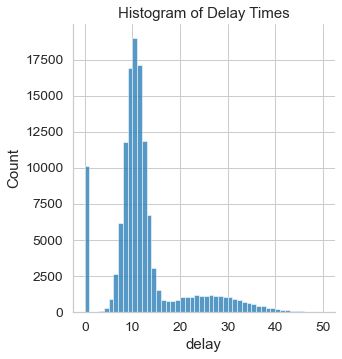

1.5191180230102215


<Figure size 432x288 with 0 Axes>

In [60]:
## Task 3
# visualize distribution of flight delays
# plt.figure(figsize=(10,8))
# sns.displot(flight.delay)
# sns.set_context('notebook', font_scale=1.25)
# plt.title('Histogram of Delay Times')

# plt.show()
# plt.clf()

# change axis limits to exclude outliers
delays=flight[flight.delay <= 50]
#print(delays.head())
plt.figure(figsize=(10,8))
sns.displot(delays.delay, bins=50)
sns.set_context('notebook', font_scale=1.25)
plt.title('Histogram of Delay Times')

plt.show()
plt.clf()

# verify skewness using .skew
print(delays.delay.skew())
#output: 1.59 (>1 suggests highly right skewed)

# # plot log transformed delay data
# delay_only=flight.delay[(flight.delay > 0) & (flight.delay <=50)]
# #print(delay_only)
# #log_delay=np.log(delay_only)
# print(log_delay)
# plt.figure(figsize=(10,8))
# sns.displot(log_delay, bins=50)
# sns.set_context('notebook', font_scale=1.25)
# plt.xlabel('Delay (Log Transformed)')
# plt.title('Histogram of Log Transformed Delay Times')

# plt.show()
# plt.clf()

1) How are flight delay times distributed? <br>
__There is a large clump around 10 min; the data are highly right skewed.__ <br>
<br>
2) What kinds of delays are typical? <br>
__Most delays appear to be \<15 min.__ <br>
<br>

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

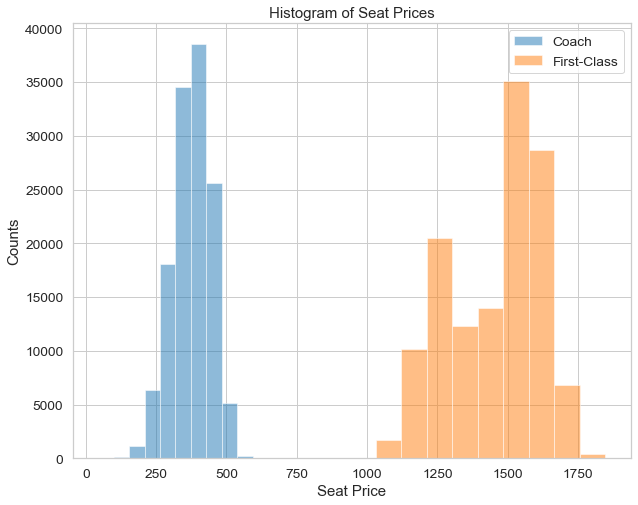

Coach Summary:
Max: 593.635
Min: 44.415
Avg: 376.5852530821279
Median: 380.56
First-Class Summary:
Max: 1846.78
Min: 939.1
Avg: 1454.9317850978382
Median: 1503.84


<Figure size 432x288 with 0 Axes>

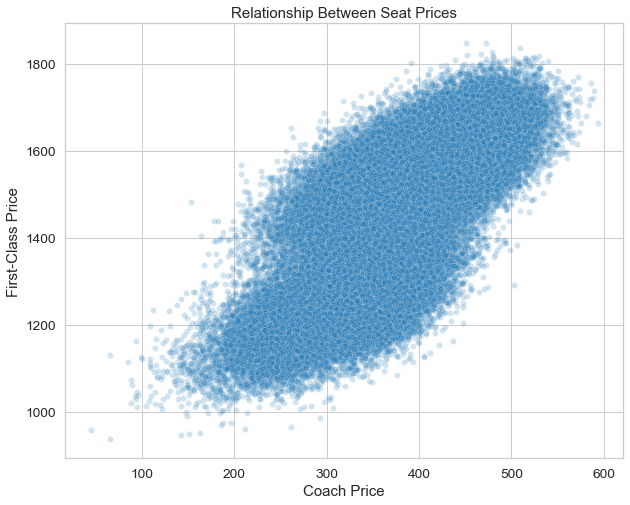

0.7587565939365974


<Figure size 432x288 with 0 Axes>

<Figure size 720x576 with 0 Axes>

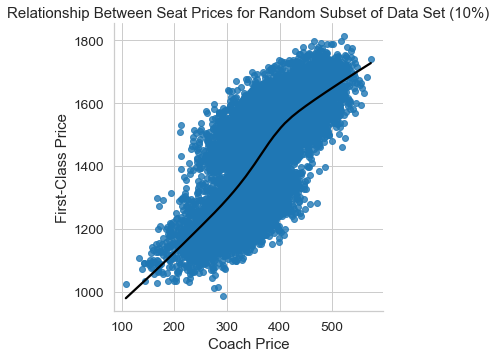

0.7553101434987055


<Figure size 432x288 with 0 Axes>

In [141]:
## Task 4

# plot distributions of both coach and first-class seats together
plt.figure(figsize=(10,8))
plt.hist(flight.coach_price, alpha=0.5)
plt.hist(flight.firstclass_price, alpha=0.5)
plt.xlabel('Seat Price')
plt.ylabel('Counts')
plt.title('Histogram of Seat Prices')
plt.legend(['Coach', 'First-Class'])

plt.show()
plt.clf()

# summarize variables
print('Coach Summary:')
print('Max:', np.max(flight.coach_price))
print('Min:', np.min(flight.coach_price))
print('Avg:', np.mean(flight.coach_price))
print('Median:', np.median(flight.coach_price))
print('First-Class Summary:')
print('Max:', np.max(flight.firstclass_price))
print('Min:', np.min(flight.firstclass_price))
print('Avg:', np.mean(flight.firstclass_price))
print('Median:', np.median(flight.firstclass_price))

# scatter plot of coach and first-class seat prices to see if there is a relationship between higher coach prices and higher first-class prices
plt.figure(figsize=(10,8))
sns.scatterplot(data=flight, x='coach_price', y='firstclass_price', alpha=0.2)
plt.xlabel('Coach Price')
plt.ylabel('First-Class Price')
plt.title('Relationship Between Seat Prices')

plt.show()
plt.clf()

# determine correlation coefficient for realtionship
corr_coach_firstclass, p = pearsonr(flight.coach_price, flight.firstclass_price)
print(corr_coach_firstclass)
#output: 0.759 (>0.6 suggests strong postive correlation between coach seat price and first-class seat price)

# just for fun, sample a subset of the data and plot lm plot to see if relationship is still as strong
perc=0.1
flight_sub=flight.sample(n=int(flight.shape[0]*perc))
# print('Sub Length:', len(flight_sub.coach_price)) #output: 10% smaller
# print('Full Length:', len(flight.coach_price)) #output: 129780
plt.figure(figsize=(10,8))
sns.lmplot(data=flight_sub, x='coach_price', y='firstclass_price', line_kws={'color':'black'}, lowess=True)
plt.xlabel('Coach Price')
plt.ylabel('First-Class Price')
plt.title('Relationship Between Seat Prices for Random Subset of Data Set (10%)')

plt.show()
plt.clf()

# determine correlation coefficient for realtionship of subset of data set
corr_coach_firstclass_sub, p = pearsonr(flight_sub.coach_price, flight_sub.firstclass_price)
print(corr_coach_firstclass_sub)
#output: 0.755 (still >0.6 suggesting even subset of data shows strong postive correlation between coach seat price and first-class seat price)

1) What is the relationship between coach and first-class seat prices? <br>
__There is no overlap in prices between seat types. Coach seat prices are normally distributed while first-class seat prices are bimodal. Coach seat prices can be summarized as follows - max: \\$593.64, min: \\$44.42, and avg.: \\$376.59, whereas first-class seat prices can be summarized as follows - max: \\$1846.78, min: \\$939.1, and avg.: \\$1454.93.__ <br>
<br>
2) Do flights with higher coach prices always have higher first-class prices as well? <br>
__There is a clear positive realtionship between coach seat price and first-class seat price with a correlation coefficient of 0.759, suggesting these data are strongly correlated. This relationship is still nearly as strong (pearson r=0.755) for a random sample of the data set containing only 10% of records.__ <br>
<br>

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

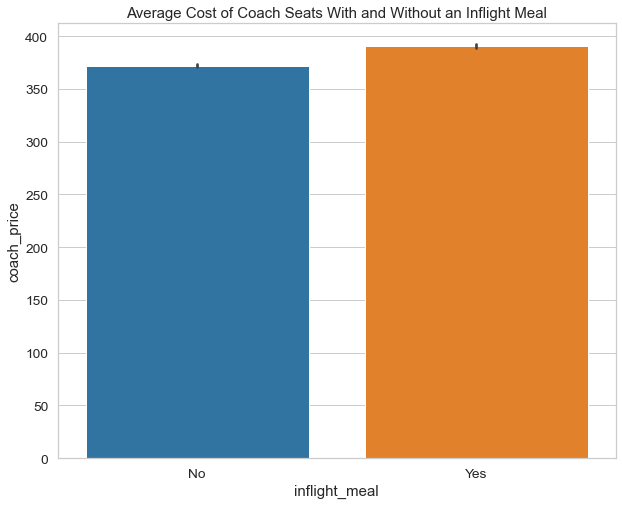

<Figure size 432x288 with 0 Axes>

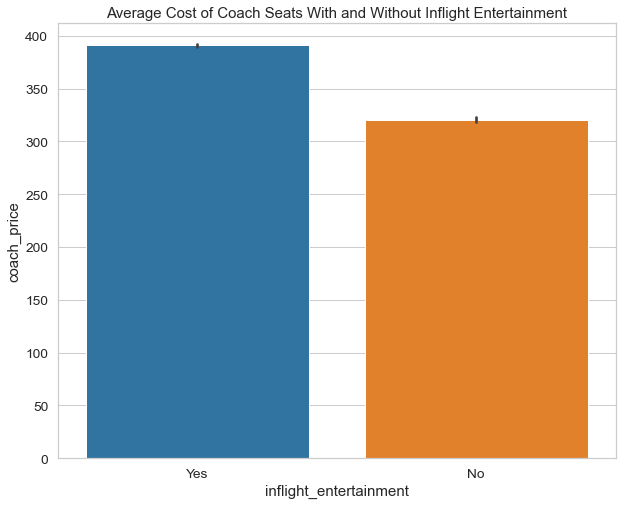

<Figure size 432x288 with 0 Axes>

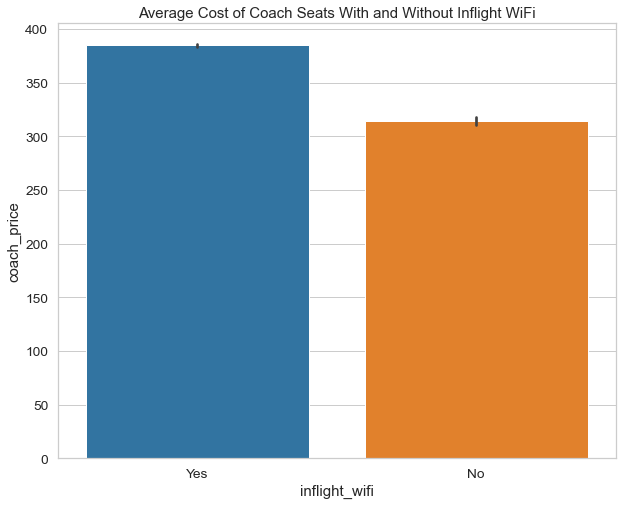

The difference in cost for coach seats with and without inflight_meal is $19.313521297194143.
The difference in cost for coach seats with and without inflight_entertainment is $70.06515472357268.
The difference in cost for coach seats with and without inflight_wifi is $70.46574876513739.


<Figure size 432x288 with 0 Axes>

In [104]:
## Task 5
#print(flight.head())

# creat bar chart for average cost of coach flight based on y/n inflight meal
plt.subplots(figsize=(10,8))
sns.barplot(data=flight_sub, x='inflight_meal', y='coach_price')
plt.title('Average Cost of Coach Seats With and Without an Inflight Meal')

plt.show()
plt.clf()

# creat bar chart for average cost of coach flight based on y/n inflight entertainment
plt.subplots(figsize=(10,8))
sns.barplot(data=flight_sub, x='inflight_entertainment', y='coach_price')
plt.title('Average Cost of Coach Seats With and Without Inflight Entertainment')

plt.show()
plt.clf()

# creat bar chart for average cost of coach flight based on y/n inflight wifi
plt.subplots(figsize=(10,8))
sns.barplot(data=flight_sub, x='inflight_wifi', y='coach_price')
plt.title('Average Cost of Coach Seats With and Without Inflight WiFi')

plt.show()
plt.clf()

# creat a function to determine difference in seat cost with and without various ammenities
def difference(data, ammenity):
    yes = data[data[ammenity] == 'Yes']
    no = data[data[ammenity] == 'No']
    difference = np.mean(yes.coach_price) - np.mean(no.coach_price)
    return print('The difference in cost for coach seats with and without {} is ${}.'.format(ammenity, difference))

difference(flight, 'inflight_meal')
#output: ...$19.31
difference(flight, 'inflight_entertainment')
#output: ...$70.06
difference(flight, 'inflight_wifi')
#output: ...$70.41

1) What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? <br>
__Adding inflight features increases the cost of coach seats for all features explored.__ <br>
<br>
2) Which features are associated with the highest increase in price? <br>
__The various ammenities increase the price as follows - inflight meal: \\$ 19.31, inflight entertainment: \\$70.06, and inflight WiFi: \\$70.47. The latter 2 are associated with the greatest increase in coach seat prices, with inflight WiFi being associated with the largest difference in price.__ <br>
<br>

6. How does the number of passengers change in relation to the length of flights?

Index(['miles', 'passengers', 'delay', 'inflight_meal',
       'inflight_entertainment', 'inflight_wifi', 'day_of_week', 'redeye',
       'weekend', 'coach_price', 'firstclass_price', 'hours'],
      dtype='object')


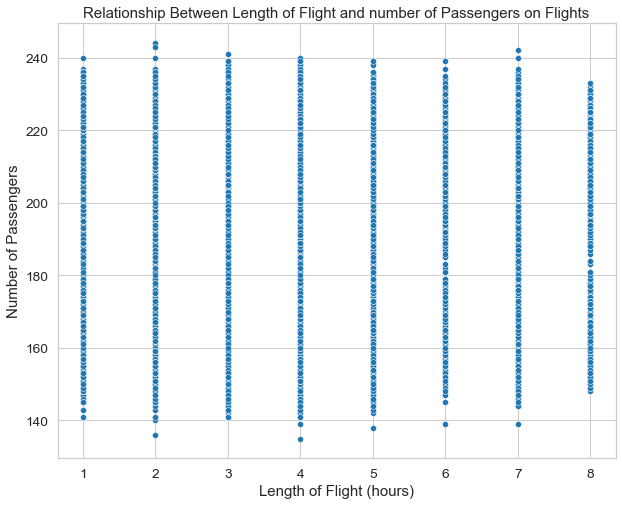

<Figure size 432x288 with 0 Axes>

<Figure size 720x576 with 0 Axes>

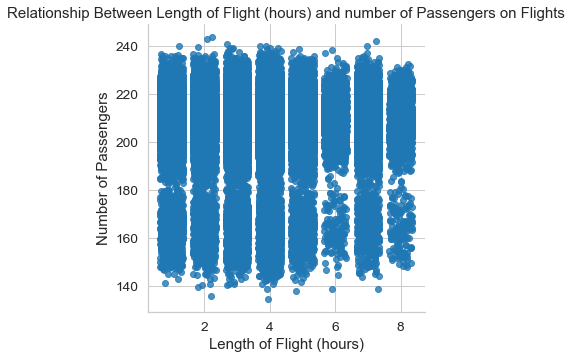

-0.003933261130375839


<Figure size 432x288 with 0 Axes>

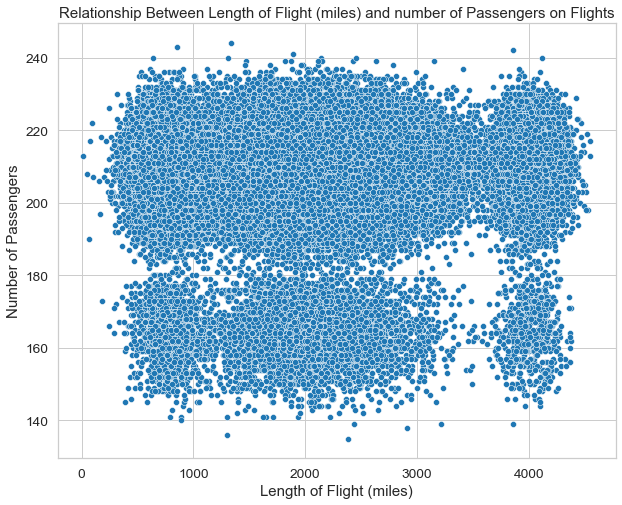

<Figure size 432x288 with 0 Axes>

<Figure size 720x576 with 0 Axes>

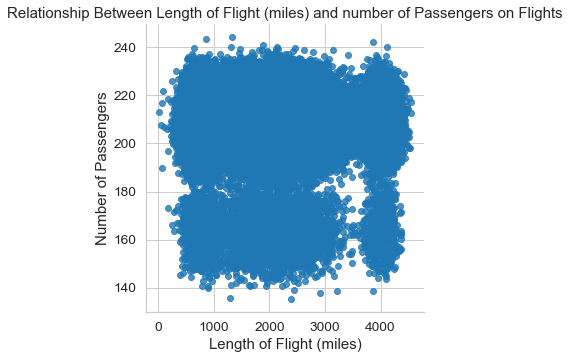

-0.002849079196225337


<Figure size 432x288 with 0 Axes>

In [115]:
## Task 6
# get df column names
print(flight.columns)

# create a scatter plot to view the relationship between number of passengers and length of flight (hours)
plt.figure(figsize=(10,8))
sns.scatterplot(data=flight, x='hours', y='passengers')
plt.xlabel('Length of Flight (hours)')
plt.ylabel('Number of Passengers')
plt.title('Relationship Between Length of Flight and number of Passengers on Flights')

plt.show()
plt.clf()

# add jitter to see number of flights at each point
plt.figure(figsize=(10,8))
sns.lmplot(data=flight, x='hours', y='passengers', x_jitter=0.35, y_jitter=0.35, fit_reg=False)
plt.xlabel('Length of Flight (hours)')
plt.ylabel('Number of Passengers')
plt.title('Relationship Between Length of Flight (hours) and number of Passengers on Flights')

plt.show()
plt.clf()

# run pearson correlation test to assess correlation
corr_hours_passengers, p = pearsonr(flight.hours, flight.passengers)
print(corr_hours_passengers)
#output: -0.004 (~0 so no apparent correlation)

# create a scatter plot to view the relationship between number of passengers and length of flight (distance)
plt.figure(figsize=(10,8))
sns.scatterplot(data=flight, x='miles', y='passengers')
plt.xlabel('Length of Flight (miles)')
plt.ylabel('Number of Passengers')
plt.title('Relationship Between Length of Flight (miles) and number of Passengers on Flights')

plt.show()
plt.clf()

# add jitter to see number of flights at each point
plt.figure(figsize=(10,8))
sns.lmplot(data=flight, x='miles', y='passengers', x_jitter=0.35, y_jitter=0.35, fit_reg=False)
plt.xlabel('Length of Flight (miles)')
plt.ylabel('Number of Passengers')
plt.title('Relationship Between Length of Flight (miles) and number of Passengers on Flights')

plt.show()
plt.clf()

# run pearson correlation test to assess correlation
corr_miles_passengers, p = pearsonr(flight.miles, flight.passengers)
print(corr_miles_passengers)
#output: -0.003 (~0 so no apparent correlation)

1) How does the number of passengers change in relation to the length of flights? <br>
__There appears to be no realtionship between the length of the flight (in hours) and the number of passengers which is summported by a near-zero Pearson r value (0.004). This lack of relationship is also seen when length of flight is evaluated based on miles traveled (pearson r = -0.003).__ <br>
<br>

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

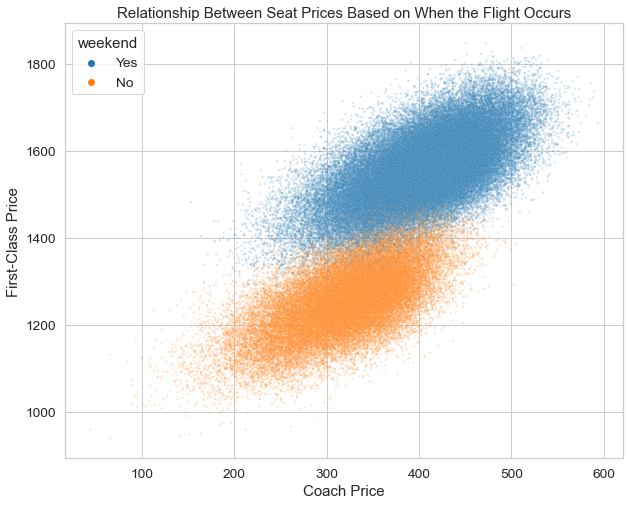

<Figure size 432x288 with 0 Axes>

In [123]:
## Task 7
# view data frame
#print(flight.head())

# create scatter plot of coach v first-class seat prices hued by weekend v weekday
plt.figure(figsize=(10,8))
sns.scatterplot(data=flight, x='coach_price', y='firstclass_price', hue='weekend', s=5, alpha=0.2)
plt.xlabel('Coach Price')
plt.ylabel('First-Class Price')
plt.title('Relationship Between Seat Prices Based on When the Flight Occurs')

plt.show()
plt.clf()

__The data show that nearly all weekend flights are more expensive than weekday flights and that nearly all weekday flights are cheaper than weekend flights.__ <br>
<br>

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

Index(['miles', 'passengers', 'delay', 'inflight_meal',
       'inflight_entertainment', 'inflight_wifi', 'day_of_week', 'redeye',
       'weekend', 'coach_price', 'firstclass_price', 'hours'],
      dtype='object')


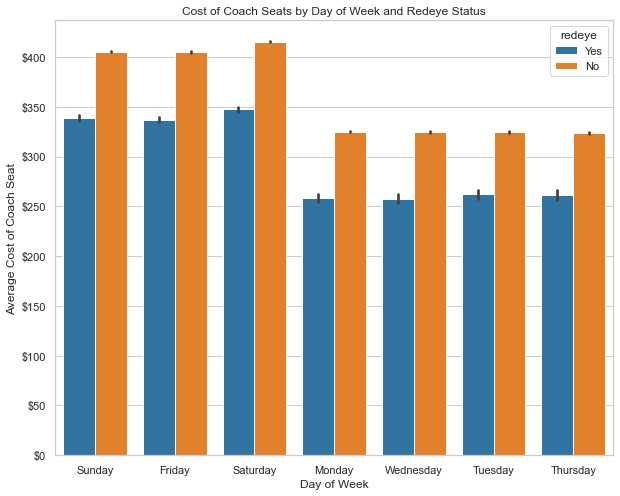

<Figure size 432x288 with 0 Axes>

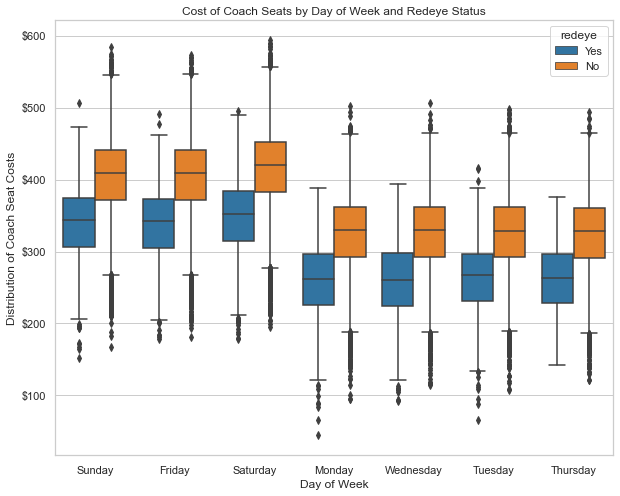

<Figure size 432x288 with 0 Axes>

In [133]:
## Task 8
# get column names
print(flight.columns)

# plot bar chart of coach seat prices for each day of the week with redeye hue
f, ax=plt.subplots(figsize=(10,8))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.barplot(data=flight, x='day_of_week', y='coach_price', hue='redeye')
plt.title('Cost of Coach Seats by Day of Week and Redeye Status')
plt.xlabel('Day of Week')
plt.ylabel('Average Cost of Coach Seat')
sns.set_context('notebook')

plt.show()
plt.clf()

# create box plot of coach seat prices for each day of the week with redeye hue (gives better idea of range of prices)
f, ax=plt.subplots(figsize=(10,8))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.boxplot(data=flight, x='day_of_week', y='coach_price', hue='redeye')
plt.title('Cost of Coach Seats by Day of Week and Redeye Status')
plt.xlabel('Day of Week')
plt.ylabel('Distribution of Coach Seat Costs')
sns.set_context('notebook')

plt.show()
plt.clf()